In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [24]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [25]:
life_df.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [26]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

We will fill in the missing values using the means of each collumn, taking into account the specific country to calculate the means.

In [27]:
life_df.columns =life_df.columns.str.strip()
       
for col in life_df.columns:
        print(col)
        print (len(col))

Country
7
Year
4
Status
6
Life expectancy
15
Adult Mortality
15
infant deaths
13
Alcohol
7
percentage expenditure
22
Hepatitis B
11
Measles
7
BMI
3
under-five deaths
17
Polio
5
Total expenditure
17
Diphtheria
10
HIV/AIDS
8
GDP
3
Population
10
thinness  1-19 years
20
thinness 5-9 years
18
Income composition of resources
31
Schooling
9


In [28]:
life_df['Polio'] = life_df['Polio'].fillna(life_df.groupby('Country')['Polio'].transform('mean'))
life_df['Life expectancy'] = life_df['Life expectancy'].fillna(life_df.groupby('Country')['Life expectancy'].transform('mean'))  
life_df['Adult Mortality'] = life_df['Adult Mortality'].fillna(life_df.groupby('Country')['Adult Mortality'].transform('mean'))  
life_df['Alcohol'] = life_df['Alcohol'].fillna(life_df.groupby('Country')['Alcohol'].transform('mean'))  
life_df['Hepatitis B'] = life_df['Hepatitis B'].fillna(life_df.groupby('Country')['Hepatitis B'].transform('mean'))  
life_df['BMI'] = life_df['BMI'].fillna(life_df.groupby('Country')['BMI'].transform('mean'))  
life_df['Total expenditure'] = life_df['Total expenditure'].fillna(life_df.groupby('Country')['Total expenditure'].transform('mean'))  
life_df['Diphtheria'] = life_df['Diphtheria'].fillna(life_df.groupby('Country')['Diphtheria'].transform('mean'))  
life_df['Population'] = life_df['Population'].fillna(life_df.groupby('Country')['Population'].transform('mean'))  
life_df['thinness  1-19 years'] = life_df['thinness  1-19 years'].fillna(life_df.groupby('Country')['thinness  1-19 years'].transform('mean'))  
life_df['thinness 5-9 years'] = life_df['thinness 5-9 years'].fillna(life_df.groupby('Country')['thinness 5-9 years'].transform('mean'))  
life_df['Income composition of resources'] = life_df['Income composition of resources'].fillna(life_df.groupby('Country')['Income composition of resources'].transform('mean'))  
life_df['Schooling'] = life_df['Schooling'].fillna(life_df.groupby('Country')['Schooling'].transform('mean'))  

life_df.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.005786
percentage expenditure             0.000000
Hepatitis B                        0.049013
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.010892
Diphtheria                         0.000000
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.220558
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [29]:

columns = ['Year','Life expectancy','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']
countries = life_df['Country'].unique()

#for column in columns:
    #for country in countries:
        #life_df.loc[life_df['Country'] == country, column].fillna(
            #life_df[life_df['Country'] == country][column].mean(), inplace=True)
        
for column in columns:
    for country in countries:
        life_df.loc[life_df['Country'] == country, column].interpolate(limit_direction = 'both')
           

In [30]:
life_df.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.005786
percentage expenditure             0.000000
Hepatitis B                        0.049013
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.010892
Diphtheria                         0.000000
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.220558
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

Text(0.5,1,'Schooling Scatterplot')

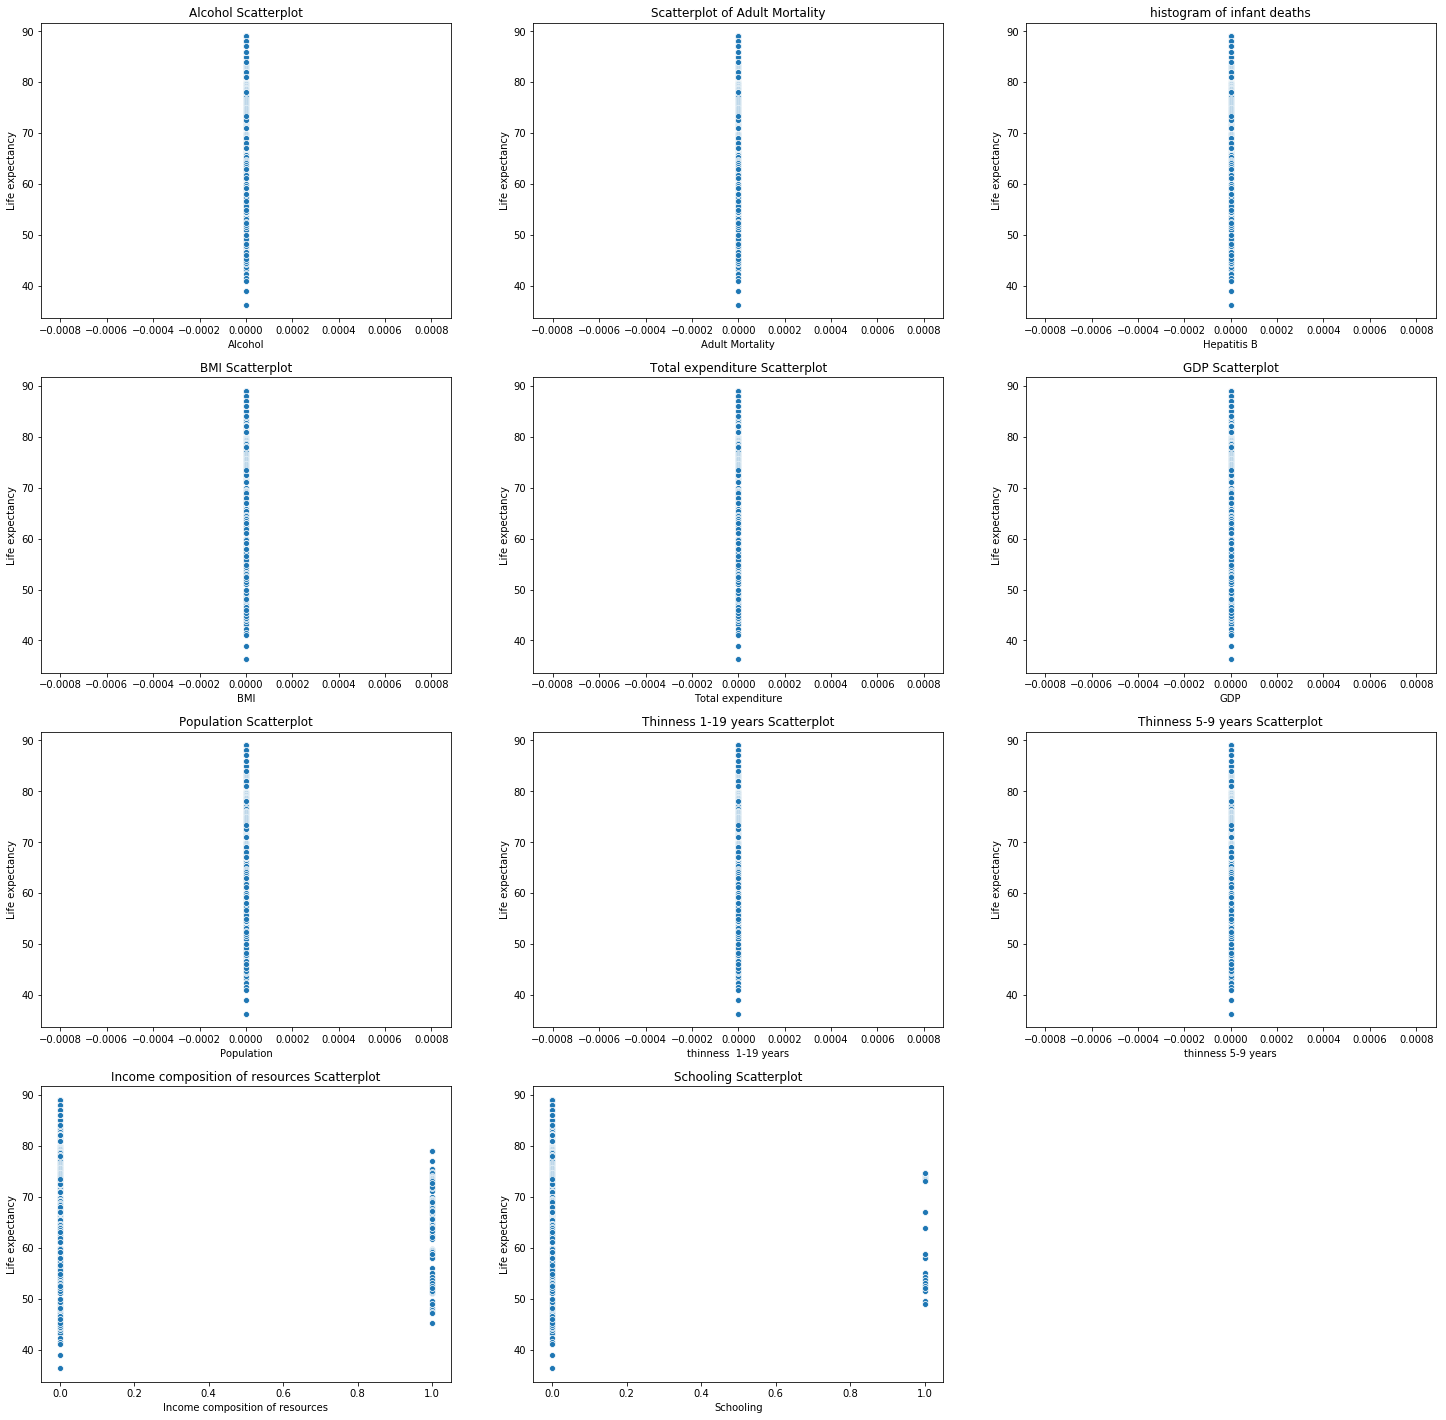

In [31]:
plt.figure(figsize =(25,25))
plt.subplot(4, 3, 1)
sns.scatterplot(x=life_df['Alcohol']==0, y=life_df['Life expectancy'])
plt.title("Alcohol Scatterplot")

plt.subplot(4, 3, 2)
sns.scatterplot(x=life_df['Adult Mortality']==0, y=life_df['Life expectancy'])
plt.title("Scatterplot of Adult Mortality")

plt.subplot(4, 3, 3)
sns.scatterplot(x=life_df['Hepatitis B']==0, y=life_df['Life expectancy'])
plt.title("histogram of infant deaths")

# histograms of the winsorized data
plt.subplot(4, 3, 4)
sns.scatterplot(x=life_df['BMI']==0, y=life_df['Life expectancy'])
plt.title("BMI Scatterplot")

plt.subplot(4, 3, 5)
sns.scatterplot(x=life_df['Total expenditure']==0, y=life_df['Life expectancy'])
plt.title("Total expenditure Scatterplot")

plt.subplot(4, 3, 6)
sns.scatterplot(x=life_df['GDP']==0, y=life_df['Life expectancy'])
plt.title("GDP Scatterplot")

# histograms of the log transformed data
plt.subplot(4, 3, 7)
sns.scatterplot(x=life_df['Population']==0, y=life_df['Life expectancy'])
plt.title("Population Scatterplot")

plt.subplot(4, 3, 8)
sns.scatterplot(x=life_df['thinness  1-19 years']==0, y=life_df['Life expectancy'])
plt.title("Thinness 1-19 years Scatterplot")

plt.subplot(4, 3, 9)
sns.scatterplot(x=life_df['thinness 5-9 years']==0, y=life_df['Life expectancy'])
plt.title("Thinness 5-9 years Scatterplot")

plt.subplot(4, 3, 10)
sns.scatterplot(x=life_df['Income composition of resources']==0, y=life_df['Life expectancy'])
plt.title("Income composition of resources Scatterplot")

plt.subplot(4, 3, 11)
sns.scatterplot(x=life_df['Schooling']==0, y=life_df['Life expectancy'])
plt.title("Schooling Scatterplot")


In [32]:
#The remaining null values appear to have no correlation to Life Expectancy which is our target variable, so they can be dropped.
life_df = life_df.dropna()

In [33]:
life_df.isnull().mean()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness  1-19 years               0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

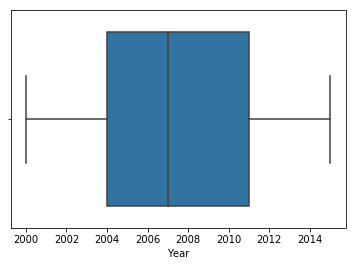

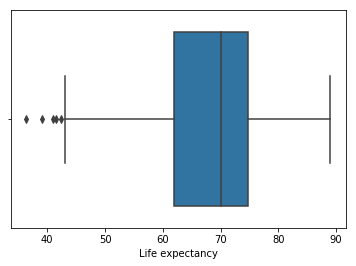

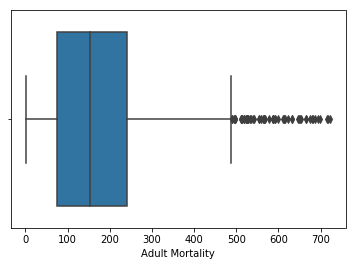

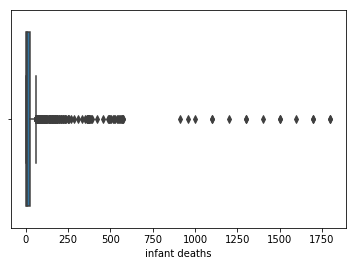

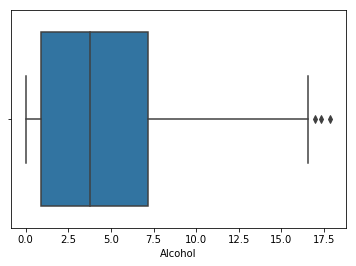

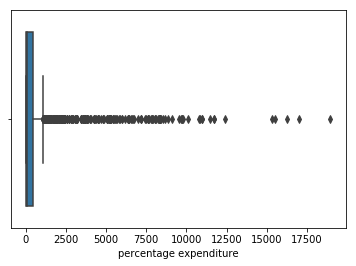

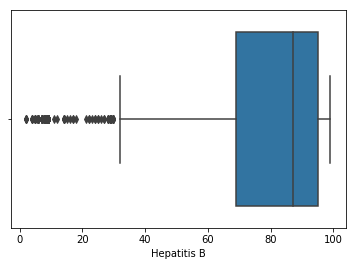

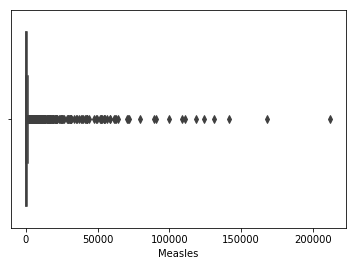

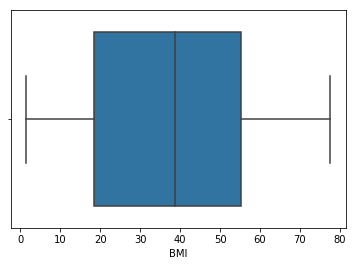

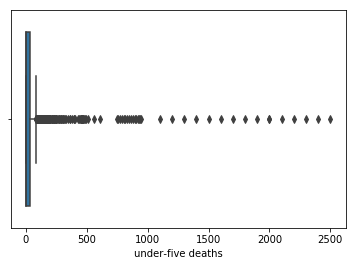

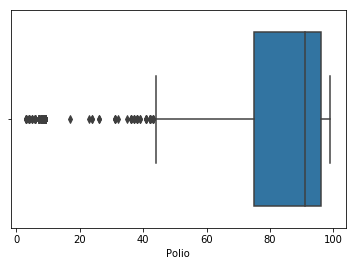

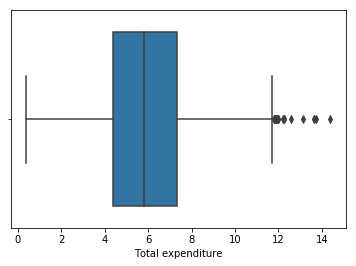

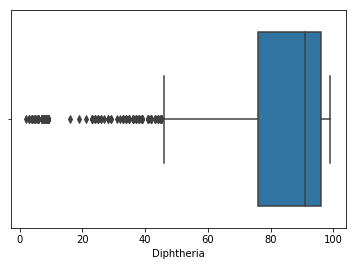

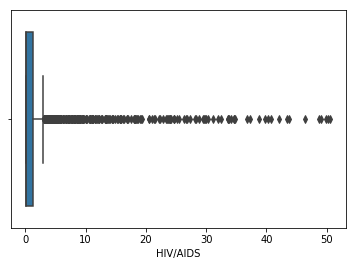

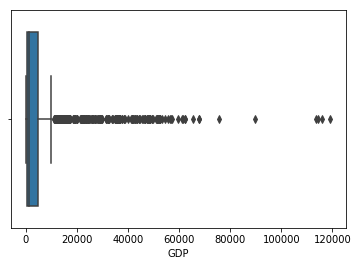

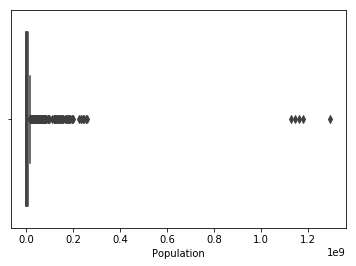

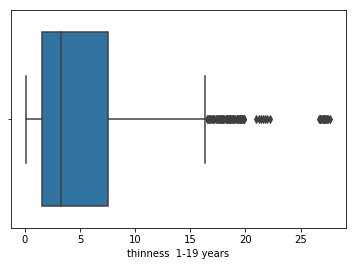

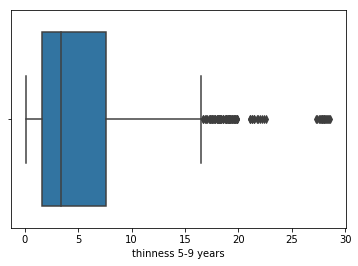

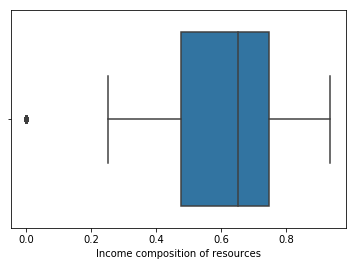

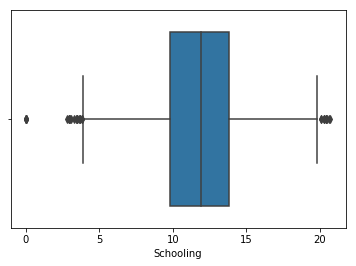

In [34]:
for column in columns:
    sns.boxplot(life_df[column])
    plt.show()
   


Viewing the box plots for each numeric column there appears to be quite a few outliers in most datasets ranging on either sides of the mean. As a result, we will use 2 way winsorization to remove any outliers beyond the 90th percentile.

In [35]:
from scipy.stats.mstats import winsorize

for column in columns:
    life_df[column] = winsorize(life_df[column], (0.10, 0.10))
    


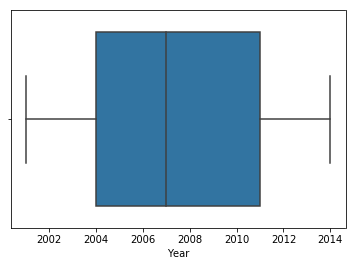

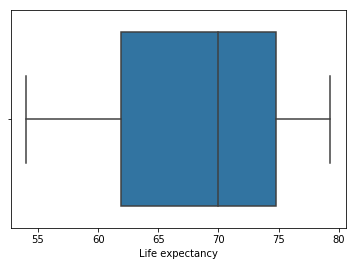

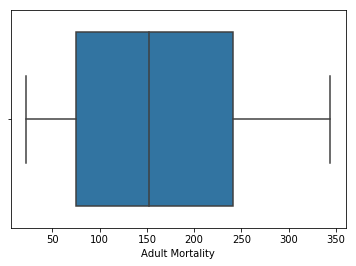

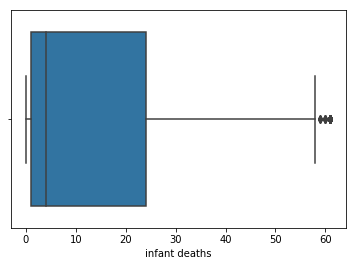

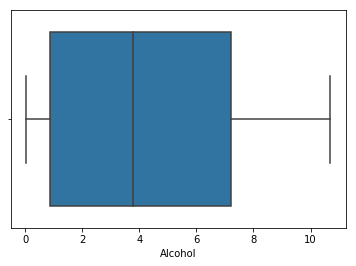

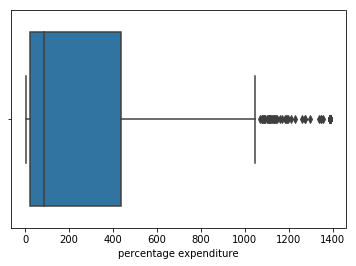

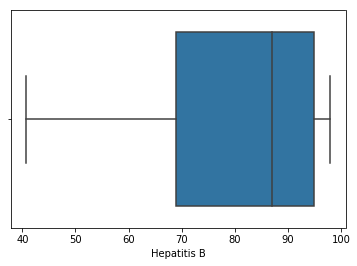

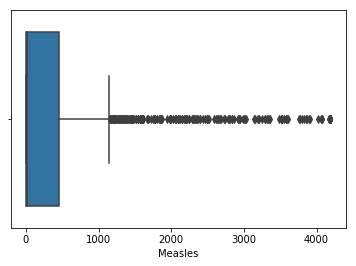

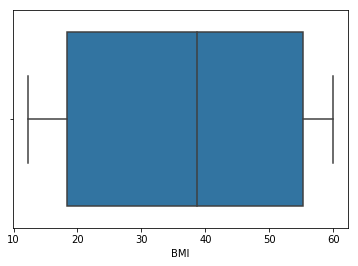

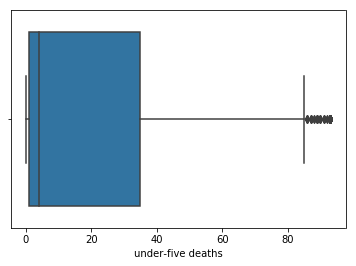

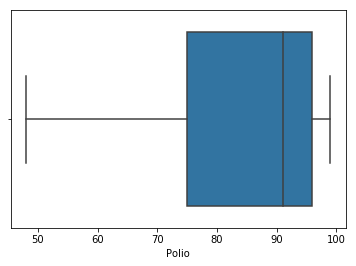

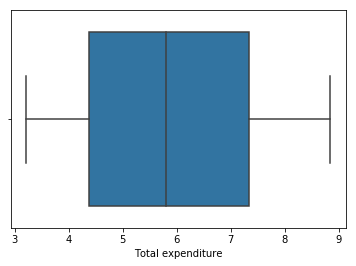

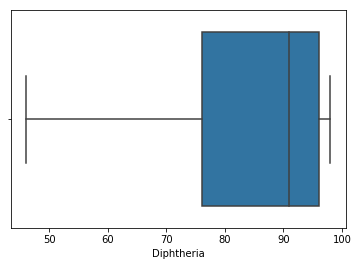

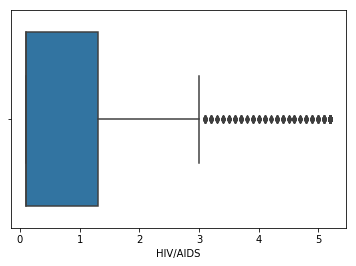

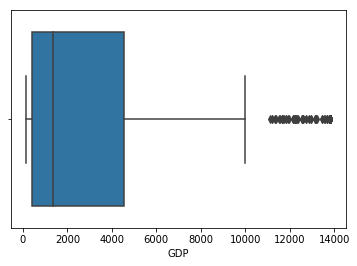

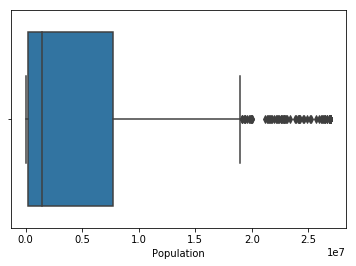

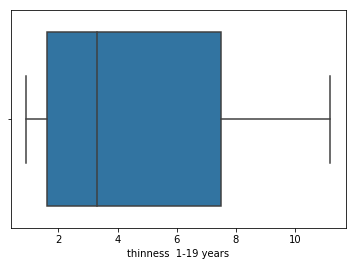

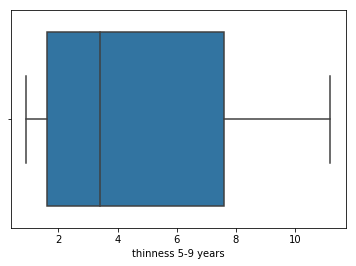

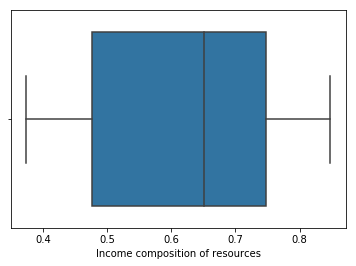

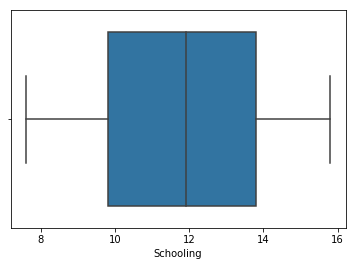

In [36]:
for column in columns:
    sns.boxplot(life_df[column])
    plt.show()

In [37]:
life_df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2110.000000,2.110000e+03,2110.000000,2110.000000,2110.000000,2110.000000
mean,2007.485308,68.327062,164.248341,15.354502,4.313282,317.896345,79.854865,694.363507,36.926066,22.400000,83.571672,5.903374,83.502573,1.123649,3455.301554,5.994319e+06,4.673934,4.719336,0.623106,11.815024
std,4.408333,8.300782,103.270956,20.801220,3.643359,442.049825,19.004686,1345.313853,17.991567,31.785975,16.557321,1.825677,16.744296,1.741705,4361.986394,8.764013e+06,3.500470,3.499974,0.156770,2.616162
min,2001.000000,54.000000,22.000000,0.000000,0.030000,3.302154,40.666667,0.000000,12.300000,0.000000,48.000000,3.210000,46.000000,0.100000,138.924927,2.962200e+04,0.900000,0.900000,0.373000,7.600000
25%,2004.000000,61.925000,75.250000,1.000000,0.870000,20.835625,69.000000,0.000000,18.400000,1.000000,75.000000,4.380000,76.000000,0.100000,395.869997,1.973152e+05,1.600000,1.600000,0.476250,9.800000
50%,2007.000000,70.000000,152.000000,4.000000,3.790000,86.985445,87.000000,20.000000,38.750000,4.000000,91.000000,5.810000,91.000000,0.100000,1361.865630,1.421367e+06,3.300000,3.400000,0.651500,11.900000
75%,2011.000000,74.800000,241.000000,24.000000,7.197500,434.797394,95.000000,459.750000,55.200000,34.750000,96.000000,7.340000,96.000000,1.300000,4540.385080,7.735673e+06,7.500000,7.600000,0.747000,13.800000
max,2014.000000,79.300000,344.000000,61.000000,10.690000,1389.772683,98.000000,4189.000000,59.900000,93.000000,99.000000,8.840000,98.000000,5.200000,13822.855900,2.693774e+07,11.200000,11.200000,0.848000,15.800000


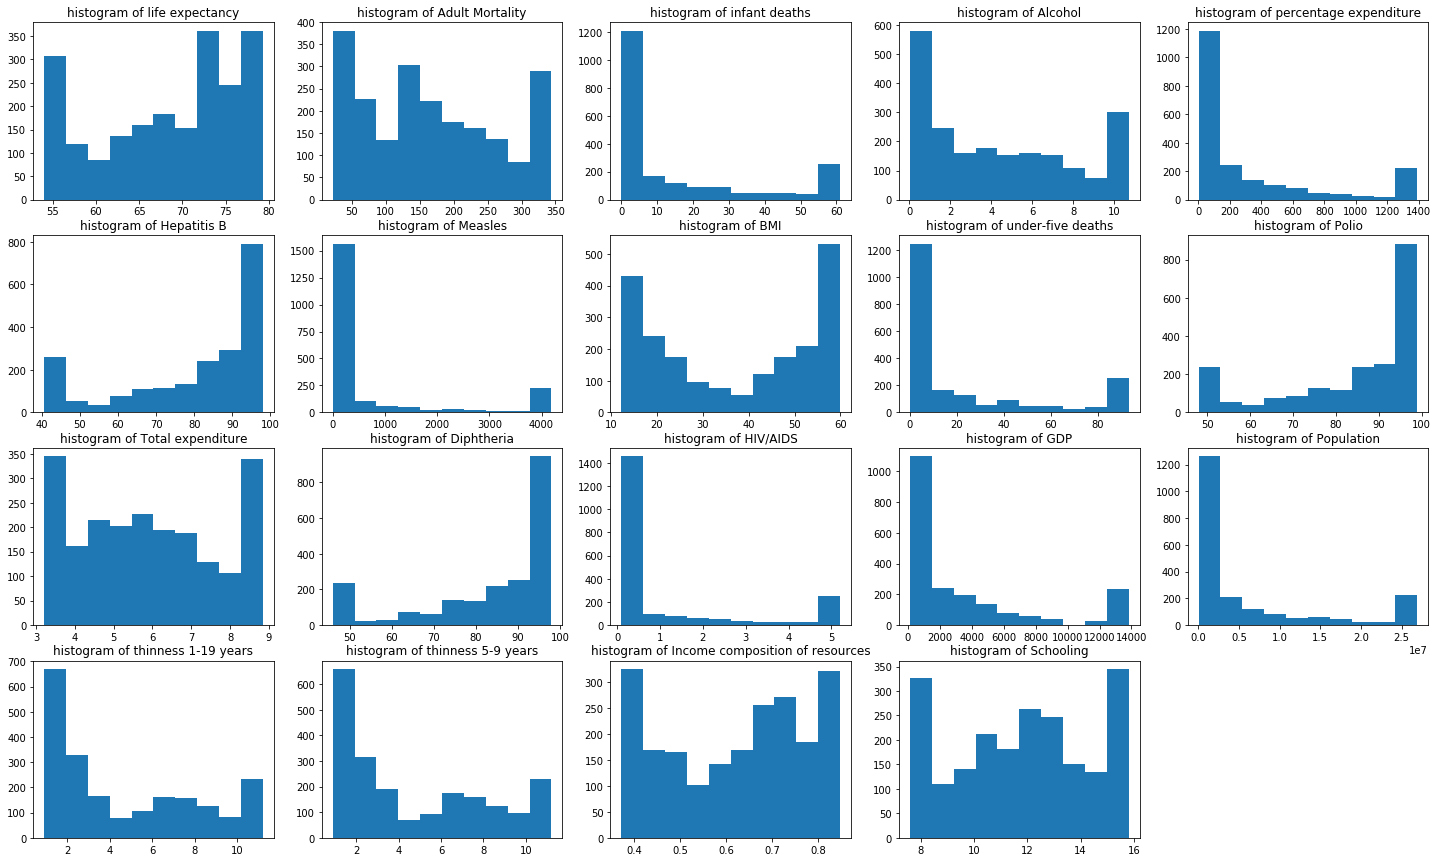

In [38]:
plt.figure(figsize =(25,15))
plt.subplot(4, 5, 1)
plt.hist(life_df["Life expectancy"])
plt.title("histogram of life expectancy")

plt.subplot(4, 5, 2)
plt.hist(life_df["Adult Mortality"])
plt.title("histogram of Adult Mortality")

plt.subplot(4, 5, 3)
plt.hist(life_df["infant deaths"])
plt.title("histogram of infant deaths")

# histograms of the winsorized data
plt.subplot(4, 5, 4)
plt.hist(life_df["Alcohol"])
plt.title("histogram of Alcohol")

plt.subplot(4, 5, 5)
plt.hist(life_df["percentage expenditure"])
plt.title("histogram of percentage expenditure")

plt.subplot(4, 5, 6)
plt.hist(life_df["Hepatitis B"])
plt.title("histogram of Hepatitis B")

# histograms of the log transformed data
plt.subplot(4, 5, 7)
plt.hist(life_df["Measles"])
plt.title("histogram of Measles")

plt.subplot(4, 5, 8)
plt.hist(life_df["BMI"])
plt.title("histogram of BMI")

plt.subplot(4, 5, 9)
plt.hist(life_df["under-five deaths"])
plt.title("histogram of under-five deaths")

plt.subplot(4, 5, 10)
plt.hist(life_df["Polio"])
plt.title("histogram of Polio")

plt.subplot(4, 5, 11)
plt.hist(life_df["Total expenditure"])
plt.title("histogram of Total expenditure")

# histograms of the log transformed data
plt.subplot(4, 5, 12)
plt.hist(life_df["Diphtheria"])
plt.title("histogram of Diphtheria")

plt.subplot(4, 5, 13)
plt.hist(life_df["HIV/AIDS"])
plt.title("histogram of HIV/AIDS")

plt.subplot(4, 5, 14)
plt.hist(life_df["GDP"])
plt.title("histogram of GDP")

plt.subplot(4, 5, 15)
plt.hist(life_df["Population"])
plt.title("histogram of Population")

plt.subplot(4, 5, 16)
plt.hist(life_df["thinness  1-19 years"])
plt.title("histogram of thinness 1-19 years")

# histograms of the log transformed data
plt.subplot(4, 5, 17)
plt.hist(life_df["thinness 5-9 years"])
plt.title("histogram of thinness 5-9 years")

plt.subplot(4, 5, 18)
plt.hist(life_df["Income composition of resources"])
plt.title("histogram of Income composition of resources")

plt.subplot(4, 5, 19)
plt.hist(life_df["Schooling"])
plt.title("histogram of Schooling")


plt.show()

In [39]:
life_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.150578,-0.048006,-0.049118,-0.043285,0.084636,0.180438,-0.159957,0.100067,-0.057003,0.126404,0.061814,0.163256,-0.111858,0.177327,0.049342,-0.055543,-0.054450,0.198342,0.208561
Life expectancy,0.150578,1.000000,-0.640996,-0.530455,0.404886,0.517231,0.312797,-0.250914,0.655119,-0.556541,0.545937,0.265446,0.552202,-0.766658,0.539537,-0.014054,-0.589084,-0.583884,0.857279,0.791903
Adult Mortality,-0.048006,-0.640996,1.000000,0.308098,-0.212541,-0.317054,-0.125969,0.103737,-0.412678,0.319820,-0.292686,-0.180088,-0.287879,0.498703,-0.320950,0.017194,0.375108,0.383931,-0.514179,-0.455257
infant deaths,-0.049118,-0.530455,0.308098,1.000000,-0.296750,-0.338016,-0.266345,0.551798,-0.500044,0.993331,-0.388630,-0.224145,-0.380050,0.341585,-0.338731,0.402723,0.407677,0.429009,-0.505248,-0.536717
Alcohol,-0.043285,0.404886,-0.212541,-0.296750,1.000000,0.503514,0.124382,-0.136769,0.416753,-0.295440,0.281939,0.286587,0.278131,-0.086178,0.540341,0.012339,-0.430036,-0.419340,0.600932,0.605652
percentage expenditure,0.084636,0.517231,-0.317054,-0.338016,0.503514,1.000000,0.084026,-0.173146,0.409082,-0.340087,0.268592,0.313914,0.267138,-0.249860,0.868009,-0.015845,-0.390505,-0.393100,0.587869,0.576693
Hepatitis B,0.180438,0.312797,-0.125969,-0.266345,0.124382,0.084026,1.000000,-0.234846,0.220043,-0.279343,0.602706,0.157662,0.663446,-0.269292,0.119417,-0.082313,-0.150161,-0.158357,0.309059,0.324756
Measles,-0.159957,-0.250914,0.103737,0.551798,-0.136769,-0.173146,-0.234846,1.000000,-0.303766,0.552896,-0.257727,-0.213281,-0.249843,0.124272,-0.170088,0.268561,0.257443,0.266454,-0.235700,-0.290668
BMI,0.100067,0.655119,-0.412678,-0.500044,0.416753,0.409082,0.220043,-0.303766,1.000000,-0.519904,0.364402,0.298567,0.364567,-0.450623,0.443331,-0.042454,-0.638100,-0.648969,0.674024,0.657107
under-five deaths,-0.057003,-0.556541,0.319820,0.993331,-0.295440,-0.340087,-0.279343,0.552896,-0.519904,1.000000,-0.407885,-0.220555,-0.400698,0.366309,-0.343905,0.376330,0.418450,0.432666,-0.528438,-0.554912


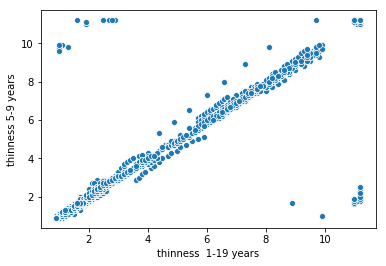

In [40]:
#It appears that two thinness columns are very highly correlated with each other and we may be able to combine them. Let's plot to take a closer look

sns.scatterplot(x=life_df['thinness  1-19 years'], y=life_df['thinness 5-9 years'])



In [41]:
#Using the graphic and the correlation matrix which shows these variables have a correlation of over 0.9, we can safely discard one of the thinness columns.

life_df.drop(['thinness  1-19 years'],axis=1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,65.0,263.0,61,0.030,71.279624,65.000000,1154,...,83,48.0,8.160000,65.0,0.1,584.259210,26937738.0,11.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,61,0.030,73.523582,62.000000,492,...,86,58.0,8.180000,62.0,0.1,612.696514,327582.0,11.2,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,61,0.030,73.219243,64.000000,430,...,89,62.0,8.130000,64.0,0.1,631.744976,26937738.0,11.2,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,61,0.030,78.184215,67.000000,2787,...,93,67.0,8.520000,67.0,0.1,669.959000,3696958.0,11.2,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,61,0.030,7.097109,68.000000,3013,...,93,68.0,7.870000,68.0,0.1,138.924927,2978599.0,11.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,61,0.030,79.679367,66.000000,1989,...,93,66.0,8.840000,66.0,0.1,553.328940,2883167.0,11.2,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,61,0.030,56.762217,63.000000,2861,...,93,63.0,8.840000,63.0,0.1,445.893298,284331.0,11.2,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,61,0.030,25.873925,64.000000,1599,...,93,64.0,8.330000,64.0,0.1,373.361116,2729431.0,11.2,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,61,0.030,10.910156,63.000000,1141,...,93,63.0,6.730000,63.0,0.1,369.835796,26616792.0,11.2,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,61,0.030,17.171518,64.000000,1990,...,93,58.0,7.430000,58.0,0.1,272.563770,2589345.0,11.2,0.405,8.1


# Summary 

In conclusion, we were able to replace and remove the Naan values in the dataset and then use visuals and a correlation matrix to determine which features would be most useful in predicting Life Expectancy, our target variable in this experiment. Highly correlated variables with our target variable (Life Expectancy) appear to be BMI, Schooling, and Income composition of resources. Variables with a negative correlation are HIV/AIDS and Adult Mortality. These would be the features I would select in a model.